# CÁLCULO DE LA MEDIDA DE ROTACIÓN

Las librerías utilizadas en el código son:

In [10]:
%matplotlib inline

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

La medida de rotación (RM) cuantifica el giro del plano de polarización de una onda al atravesar un medio magnetizado e ionizado, creciendo el ángulo $\psi$ proporcionalmente a $\lambda^2$. Se determina midiendo $\psi$ en varias longitudes de onda y ajustando

$$
\Delta\psi = \mathrm{RM}\,\lambda^2  \quad \rightarrow  \quad \psi(\lambda) = \psi_0 + \mathrm{RM}\,\lambda^2
$$

de modo que RM [$rad/m^2$] aparece como la pendiente de esa recta. El signo de RM indica la dirección del campo magnético a lo largo de la línea de visión (hacia o alejándose de nosotros).


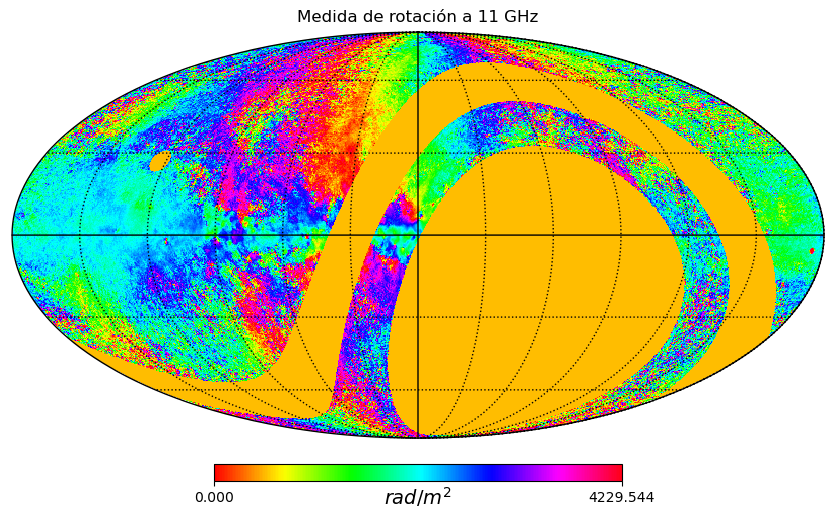

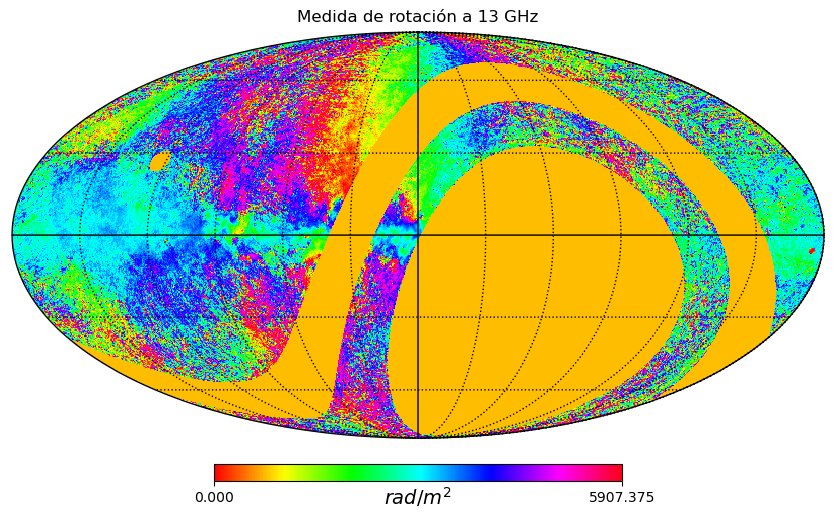

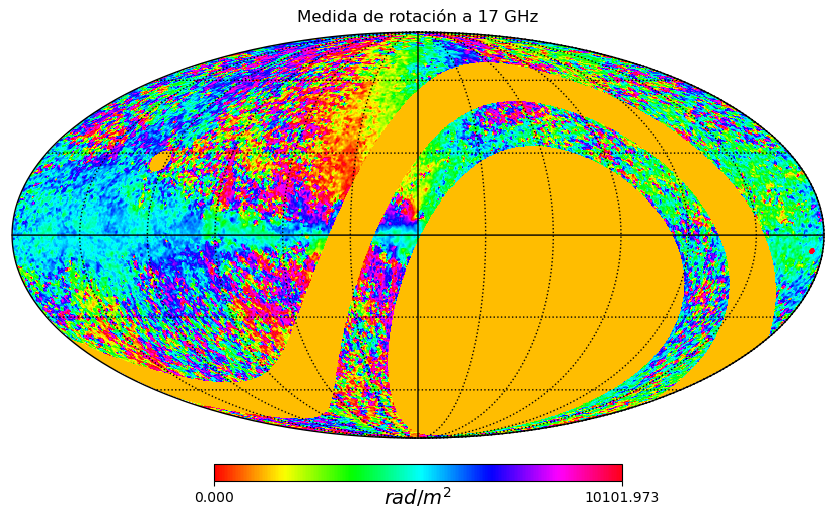

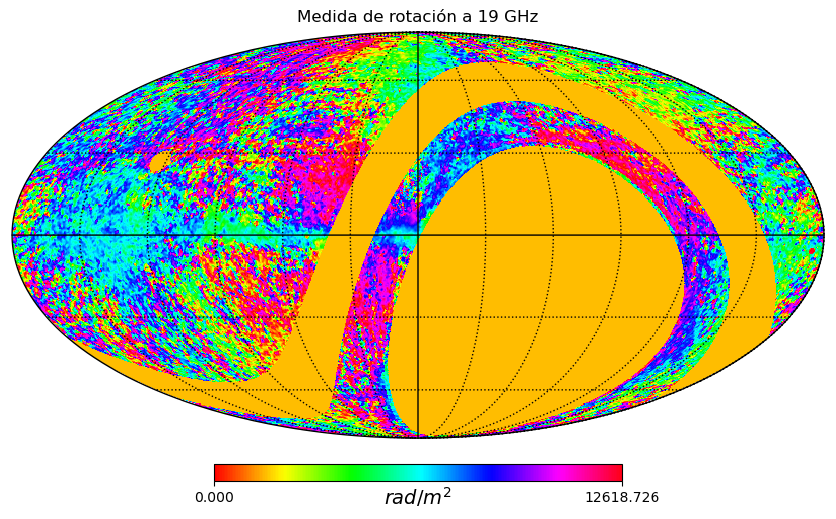

In [11]:
velocidad_luz = 299792458.0  # Velocidad de la luz en m/s (valor exacto según CODATA)

frecuencias = [11, 13, 17, 19]

def difpsi(Q, U):
    psi = 0.5 * np.arctan2(U, Q) + np.pi/2
    return psi

def rotationmeasure(psi, freq_ghz):
    freq_hz = freq_ghz * 1e9       # Convertimos GHz a Hz
    lambda_m = velocidad_luz / freq_hz  # Longitud de onda en metros
    RM = psi / lambda_m**2  
    return RM

# Guardamos los mapas para el cálculo de residuos

RM_maps = {}

for freq in frecuencias:
    
    archivo = f"quijote_mfi_smth_skymap_{freq}ghz_512_dr1.fits"

    # Lectura de los mapas de Q y U

    mapQ = hp.read_map(archivo, field=1)
    mapU = hp.read_map(archivo, field=2)

    # Cálculo del ángulo de polarización

    psi = difpsi(mapQ, mapU)

    # Cálculo de la medida de rotación

    RM = rotationmeasure(psi,freq)

    # Guarda resultados por frecuencia

    RM_maps[freq] = RM

    # Visualización de la medida de rotación

    hp.mollview(RM,
                title=f"Medida de rotación a {freq} GHz",
                unit="$rad/m^2$",
                cmap="hsv",
                format="%.3f",
                min=0, max=max(RM))
    hp.graticule()
    plt.show()

En los mapas de 17 GHz y 19 GHz, se observa que la RM aumenta en lugar de disminuir lo cual indica que hay algún tipo de contaminación.

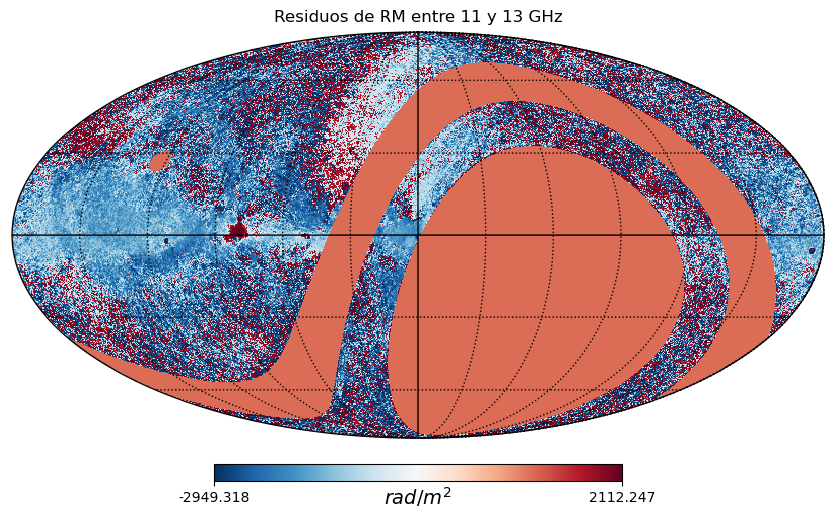

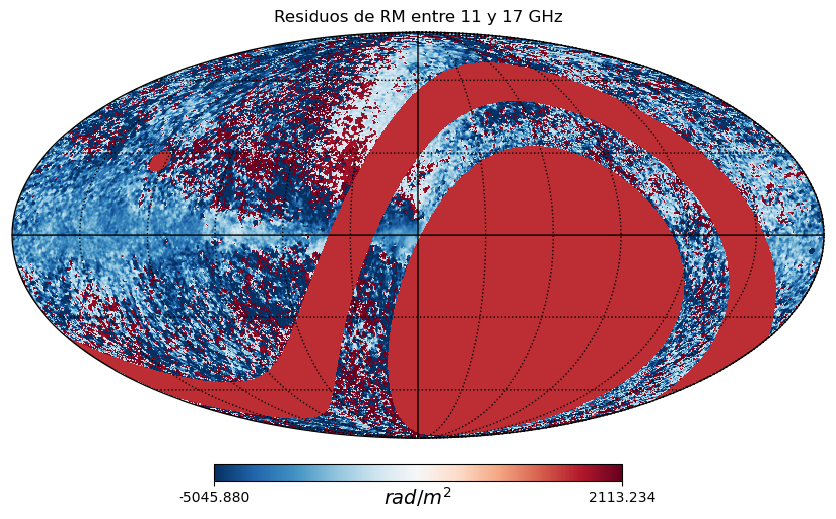

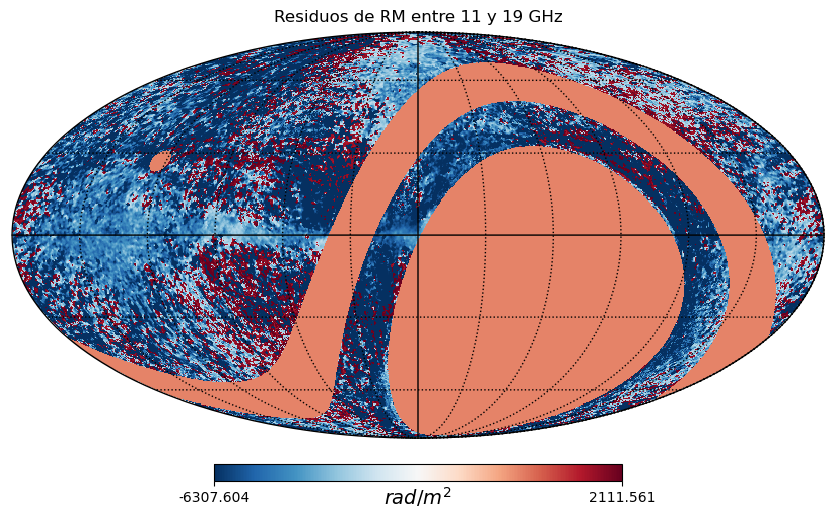

In [12]:
    ##############################################################################
    #                              CÁLCULO DE RESIDUOS                           #
    ##############################################################################

    # Asegura la operación píxel a píxel con las mismas máscaras NaN

    mask = np.isfinite(RM_maps[11]) & np.isfinite(RM_maps[13]) & np.isfinite(RM_maps[17]) & np.isfinite(RM_maps[19])

    res_11_13 = np.full_like(RM_maps[11], np.nan)
    res_11_17 = np.full_like(RM_maps[11], np.nan)
    res_11_19 = np.full_like(RM_maps[11], np.nan)

    res_11_13[mask] = RM_maps[11][mask] - RM_maps[13][mask]   # RM(11) - RM(13)
    res_11_17[mask] = RM_maps[11][mask] - RM_maps[17][mask]   # RM(11) - RM(17)
    res_11_19[mask] = RM_maps[11][mask] - RM_maps[19][mask]   # RM(11) - RM(19)

    # Visualización de los mapas de residuos

    hp.mollview(res_11_13,
                title=f"Residuos de RM entre 11 y 13 GHz",
                unit="$rad/m^2$",
                cmap="RdBu_r",
                norm="hist",
                format="%.3f",
                min=np.nanmin(res_11_13)/2, max=np.nanmax(res_11_13)/2)
    hp.graticule()
    plt.show()

    hp.mollview(res_11_17,
                title=f"Residuos de RM entre 11 y 17 GHz",
                unit="$rad/m^2$",
                cmap="RdBu_r",
                norm="hist",
                format="%.3f",
                min=np.nanmin(res_11_17)/2, max=np.nanmax(res_11_17)/2)
    hp.graticule()
    plt.show()

    hp.mollview(res_11_19,
                title=f"Residuos de RM entre 11 y 19 GHz",
                unit="$rad/m^2$",
                cmap="RdBu_r",
                norm="hist",
                format="%.3f",
                min=np.nanmin(res_11_19)/2, max=np.nanmax(res_11_19)/2)
    hp.graticule()
    plt.show()